## How often does President Trump tweet each day?

In [51]:
import altair as alt
import pandas as pd
import psycopg2 as pg
import matplotlib as mpl
import numpy as np
import json
import pytz
from datetime import datetime
import altair_latimes as lat
alt.renderers.enable('notebook')
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

### Dump from trumptweetarchive.com

In [52]:
src = pd.read_json('/Users/mhustiles/Desktop/github/notebooks/trump-tweet-frequency/all.json')

### Clean up dates

In [53]:
src['eastern_created_at'] = src['created_at'].dt.time
src['eastern_created_at'] = src['created_at'].dt.tz_localize("GMT").dt.tz_convert('America/Los_Angeles')
src['date'] = pd.to_datetime(src['eastern_created_at']).dt.strftime('%m/%d/%Y')
src['date'] = pd.to_datetime(src['date'])
src['year'] = src['eastern_created_at'].dt.year
src['month'] = src['eastern_created_at'].dt.month
src['day'] = src['eastern_created_at'].dt.day
src['hour'] = src['eastern_created_at'].dt.hour
src['minute'] = src['eastern_created_at'].dt.minute
src['time'] = src['eastern_created_at'].dt.time
src['id_str'] = src['id_str'].astype(str)
src['year'] = src['year'].astype(str)
src['month'] = src['month'].astype(str)
src['day'] = src['day'].astype(str)
src['hour'] = src['hour'].astype(str)

In [54]:
src.dtypes

created_at                                 datetime64[ns]
favorite_count                                      int64
id_str                                             object
is_retweet                                        float64
retweet_count                                       int64
source                                             object
text                                               object
eastern_created_at    datetime64[ns, America/Los_Angeles]
date                                       datetime64[ns]
year                                               object
month                                              object
day                                                object
hour                                               object
minute                                              int64
time                                               object
dtype: object

### Tweets per year

In [55]:
trump_years = src.groupby(['year', 'month']).agg({'date': 'count'})

In [56]:
trump_years

date
year month      
2009 10        4
     11        3
     12        2
     5        21
     6        11
     7         5
     8         7
     9         3
2010 1         4
     10        9
     11       11
     12       10
     2         4
     3        10
     4        18
     5        17
     6        17
     7        13
     8        16
     9        13
2011 1         9
     10      106
     11      112
     12      184
     2        16
     3        36
     4         5
     5        13
     6        16
     7        73
...          ...
2017 12      196
     2       153
     3       145
     4       152
     5       157
     6       210
     7       245
     8       267
     9       307
2018 1       205
     10      389
     11      340
     12      291
     2       175
     3       171
     4       257
     5       259
     6       386
     7       338
     8       383
     9       378
2019 1       369
     2       250
     3       400
     4       431
     5       692
     6       492
     7       691
     8       686
     9       774

[125 rows x 1 columns]

### What did he average each day in retweets, likes and replies

In [57]:
trump_engagements_day = src.groupby(['date']).mean().round().reset_index()

In [58]:
trump_engagements_day.head()

,date,favorite_count,is_retweet,retweet_count,minute
0,2009-05-04,102.0,0.0,128.0,27.0
1,2009-05-08,14.0,0.0,6.0,39.0
2,2009-05-12,982.0,0.0,716.0,14.0
3,2009-05-13,10.0,0.0,11.0,38.0
4,2009-05-14,6.0,0.0,3.0,30.0


### Limit data to when Trump took office

In [59]:
trumpall_prez = src[src.date >= '01/20/2017']

In [60]:
trumpall_prez

,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,eastern_created_at,date,year,month,day,hour,minute,time
0,2019-09-30 03:53:55,0,1178518307848278016,1.0,4417,Twitter for iPhone,RT @GOPLeader: These are the most important fa...,2019-09-29 20:53:55-07:00,2019-09-29,2019,9,29,20,53,20:53:55
1,2019-09-30 03:24:24,0,1178510879488389120,1.0,89118,Twitter for iPhone,RT @realDonaldTrump: I AM DRAINING THE SWAMP! ...,2019-09-29 20:24:24-07:00,2019-09-29,2019,9,29,20,24,20:24:24
2,2019-09-30 03:01:10,14133,1178505032892846080,0.0,4751,Twitter Media Studio,https://t.co/hbSLaM3rGk,2019-09-29 20:01:10-07:00,2019-09-29,2019,9,29,20,1,20:01:10
3,2019-09-30 02:41:16,23653,1178500028085743616,0.0,8395,Twitter Media Studio,“This is about proving that Donald Trump was f...,2019-09-29 19:41:16-07:00,2019-09-29,2019,9,29,19,41,19:41:16
4,2019-09-30 02:30:17,16084,1178497262550421504,0.0,5512,Twitter Media Studio,https://t.co/CKRQNECvRu,2019-09-29 19:30:17-07:00,2019-09-29,2019,9,29,19,30,19:30:17
5,2019-09-30 01:11:55,35522,1178477539653771264,0.0,10543,Twitter for iPhone,....If the Democrats are successful in removin...,2019-09-29 18:11:55-07:00,2019-09-29,2019,9,29,18,11,18:11:55
6,2019-09-30 01:11:54,13962,1178477536818413568,0.0,4576,Twitter for iPhone,....rid of Donald J. Trump - And the Democrats...,2019-09-29 18:11:54-07:00,2019-09-29,2019,9,29,18,11,18:11:54
7,2019-09-30 01:11:54,29539,1178477538177425408,0.0,7762,Twitter for iPhone,"....Election, and negate the votes of millions...",2019-09-29 18:11:54-07:00,2019-09-29,2019,9,29,18,11,18:11:54
8,2019-09-30 01:11:53,40766,1178477534347960320,0.0,11311,Twitter for iPhone,“Nancy Pelosi and the Democrats can’t put down...,2019-09-29 18:11:53-07:00,2019-09-29,2019,9,29,18,11,18:11:53
9,2019-09-30 00:30:58,48610,1178467237096775680,0.0,14381,Twitter for iPhone,“State Department has stepped up Hillary Clint...,2019-09-29 17:30:58-07:00,2019-09-29,2019,9,29,17,30,17:30:58


### Limit data to month Trump announced candidacy

In [62]:
trumpall_running = src[src.date >= '06/01/2015']
trumpall_running

,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,eastern_created_at,date,year,month,day,hour,minute,time
0,2019-09-30 03:53:55,0,1178518307848278016,1.0,4417,Twitter for iPhone,RT @GOPLeader: These are the most important fa...,2019-09-29 20:53:55-07:00,2019-09-29,2019,9,29,20,53,20:53:55
1,2019-09-30 03:24:24,0,1178510879488389120,1.0,89118,Twitter for iPhone,RT @realDonaldTrump: I AM DRAINING THE SWAMP! ...,2019-09-29 20:24:24-07:00,2019-09-29,2019,9,29,20,24,20:24:24
2,2019-09-30 03:01:10,14133,1178505032892846080,0.0,4751,Twitter Media Studio,https://t.co/hbSLaM3rGk,2019-09-29 20:01:10-07:00,2019-09-29,2019,9,29,20,1,20:01:10
3,2019-09-30 02:41:16,23653,1178500028085743616,0.0,8395,Twitter Media Studio,“This is about proving that Donald Trump was f...,2019-09-29 19:41:16-07:00,2019-09-29,2019,9,29,19,41,19:41:16
4,2019-09-30 02:30:17,16084,1178497262550421504,0.0,5512,Twitter Media Studio,https://t.co/CKRQNECvRu,2019-09-29 19:30:17-07:00,2019-09-29,2019,9,29,19,30,19:30:17
5,2019-09-30 01:11:55,35522,1178477539653771264,0.0,10543,Twitter for iPhone,....If the Democrats are successful in removin...,2019-09-29 18:11:55-07:00,2019-09-29,2019,9,29,18,11,18:11:55
6,2019-09-30 01:11:54,13962,1178477536818413568,0.0,4576,Twitter for iPhone,....rid of Donald J. Trump - And the Democrats...,2019-09-29 18:11:54-07:00,2019-09-29,2019,9,29,18,11,18:11:54
7,2019-09-30 01:11:54,29539,1178477538177425408,0.0,7762,Twitter for iPhone,"....Election, and negate the votes of millions...",2019-09-29 18:11:54-07:00,2019-09-29,2019,9,29,18,11,18:11:54
8,2019-09-30 01:11:53,40766,1178477534347960320,0.0,11311,Twitter for iPhone,“Nancy Pelosi and the Democrats can’t put down...,2019-09-29 18:11:53-07:00,2019-09-29,2019,9,29,18,11,18:11:53
9,2019-09-30 00:30:58,48610,1178467237096775680,0.0,14381,Twitter for iPhone,“State Department has stepped up Hillary Clint...,2019-09-29 17:30:58-07:00,2019-09-29,2019,9,29,17,30,17:30:58


### Count daily tweets since candidacy, create dataframe with results

In [63]:
trump_tweets_day_candidacy = trumpall_running.groupby(['date']).size()
trump_tweets_day_candidacy_df = pd.DataFrame({'date': trump_tweets_day_candidacy.index, 'count': trump_tweets_day_candidacy.values})

### Count daily tweets since inaguration, create dataframe with results

In [64]:
trump_tweets_day_prez = trumpall_prez.groupby(['date']).size()
trump_tweets_day_prez_df = pd.DataFrame({'date': trump_tweets_day_prez.index, 'count': trump_tweets_day_prez.values})

### Sort table to see top days since candidacy

In [65]:
trump_freq_candidacy = trump_tweets_day_candidacy_df.sort_values(['count'], ascending=False)

In [66]:
trump_freq_candidacy.head(10)

,date,count
132,2015-10-13,93
503,2016-10-19,87
1417,2019-05-01,84
1427,2019-05-11,71
137,2015-10-18,69
493,2016-10-09,68
110,2015-09-21,63
31,2015-07-02,60
1565,2019-09-26,60
1539,2019-08-31,59


### Sort table to see top days since inauguration

In [67]:
trump_freq_inauguration = trump_tweets_day_prez_df.sort_values(['count'], ascending=False)

In [68]:
trump_freq_inauguration.head(10)

,date,count
824,2019-05-01,84
834,2019-05-11,71
972,2019-09-26,60
946,2019-08-31,59
880,2019-06-26,50
928,2019-08-13,49
975,2019-09-29,48
869,2019-06-15,47
888,2019-07-04,46
964,2019-09-18,45


### Read all from today

In [69]:
trump_tweets_today = trumpall_prez[trumpall_prez.date == '09/29/2019']
trump_tweets_today

,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,eastern_created_at,date,year,month,day,hour,minute,time
0,2019-09-30 03:53:55,0,1178518307848278016,1.0,4417,Twitter for iPhone,RT @GOPLeader: These are the most important fa...,2019-09-29 20:53:55-07:00,2019-09-29,2019,9,29,20,53,20:53:55
1,2019-09-30 03:24:24,0,1178510879488389120,1.0,89118,Twitter for iPhone,RT @realDonaldTrump: I AM DRAINING THE SWAMP! ...,2019-09-29 20:24:24-07:00,2019-09-29,2019,9,29,20,24,20:24:24
2,2019-09-30 03:01:10,14133,1178505032892846080,0.0,4751,Twitter Media Studio,https://t.co/hbSLaM3rGk,2019-09-29 20:01:10-07:00,2019-09-29,2019,9,29,20,1,20:01:10
3,2019-09-30 02:41:16,23653,1178500028085743616,0.0,8395,Twitter Media Studio,“This is about proving that Donald Trump was f...,2019-09-29 19:41:16-07:00,2019-09-29,2019,9,29,19,41,19:41:16
4,2019-09-30 02:30:17,16084,1178497262550421504,0.0,5512,Twitter Media Studio,https://t.co/CKRQNECvRu,2019-09-29 19:30:17-07:00,2019-09-29,2019,9,29,19,30,19:30:17
5,2019-09-30 01:11:55,35522,1178477539653771264,0.0,10543,Twitter for iPhone,....If the Democrats are successful in removin...,2019-09-29 18:11:55-07:00,2019-09-29,2019,9,29,18,11,18:11:55
6,2019-09-30 01:11:54,13962,1178477536818413568,0.0,4576,Twitter for iPhone,....rid of Donald J. Trump - And the Democrats...,2019-09-29 18:11:54-07:00,2019-09-29,2019,9,29,18,11,18:11:54
7,2019-09-30 01:11:54,29539,1178477538177425408,0.0,7762,Twitter for iPhone,"....Election, and negate the votes of millions...",2019-09-29 18:11:54-07:00,2019-09-29,2019,9,29,18,11,18:11:54
8,2019-09-30 01:11:53,40766,1178477534347960320,0.0,11311,Twitter for iPhone,“Nancy Pelosi and the Democrats can’t put down...,2019-09-29 18:11:53-07:00,2019-09-29,2019,9,29,18,11,18:11:53
9,2019-09-30 00:30:58,48610,1178467237096775680,0.0,14381,Twitter for iPhone,“State Department has stepped up Hillary Clint...,2019-09-29 17:30:58-07:00,2019-09-29,2019,9,29,17,30,17:30:58


### Chart it!

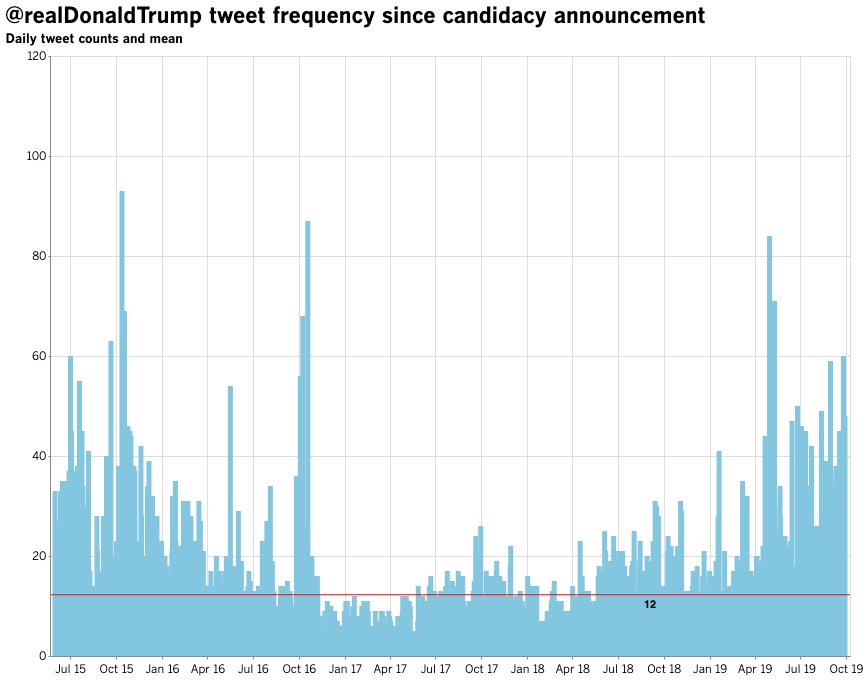

In [70]:
#bars

lines = alt.Chart(trump_tweets_day_candidacy_df, title = '@realDonaldTrump tweet frequency since candidacy announcement').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b %y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 120)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean

rule = alt.Chart(trump_tweets_day_candidacy_df).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( lines + rule + text ).properties(height=600,width=800)

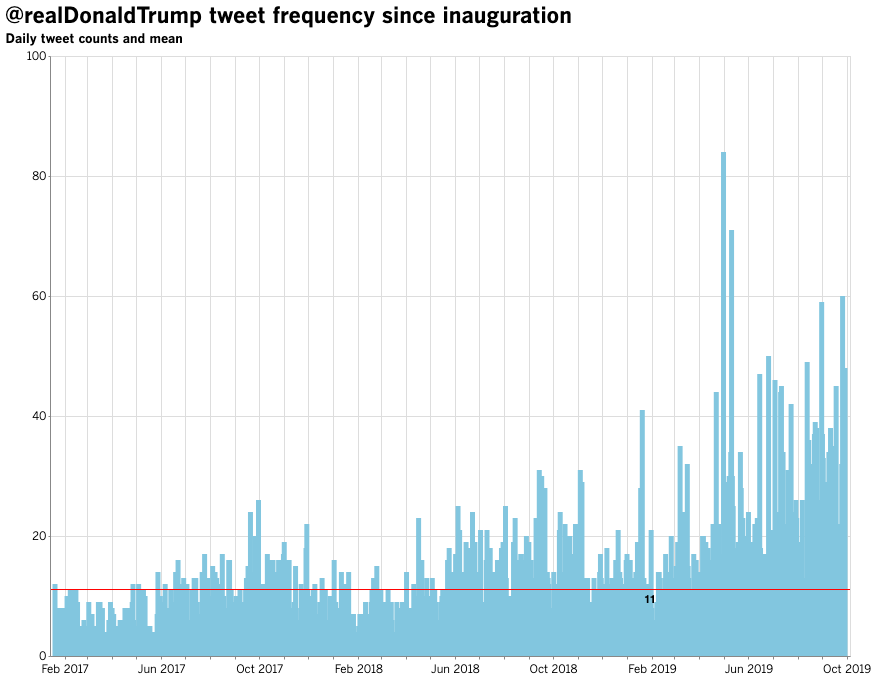

In [71]:
#bars

bars = alt.Chart(trump_freq_inauguration, title = '@realDonaldTrump tweet frequency since inauguration').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b 20%y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 100)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean

rule = alt.Chart(trump_freq_inauguration).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( bars + rule + text ).properties(height=600,width=800)